In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df, how='inner', on='city')
# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

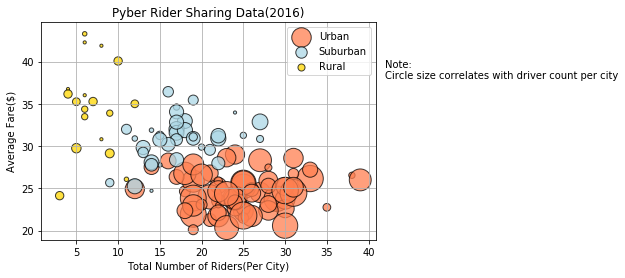

In [4]:
# Obtain the x and y coordinates for each of the three city types
city_groupby_df = combined_data_df.groupby('city')

number_rides = city_groupby_df['ride_id'].count()
avg_fare = city_groupby_df['fare'].mean()
num_drivers = city_groupby_df['driver_count'].mean()
city_types = city_groupby_df['type'].max()

city_summary_table = pd.DataFrame({ 'Number of Rides': number_rides,
                                   'Average Fare': avg_fare,
                                   'Number of Drivers': num_drivers,
                                   'City Type': city_types    
})
city_summary_table.head()

#Urban
urban_df = city_summary_table.loc[city_summary_table['City Type'] == 'Urban', :]
urban_df
#Suburban
suburban_df = city_summary_table.loc[city_summary_table['City Type'] == 'Suburban', :]
suburban_df
#Rural
rural_df = city_summary_table.loc[city_summary_table['City Type'] == 'Rural', :]
rural_df
# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_df['Number of Rides'], urban_df['Average Fare'], s = urban_df["Number of Drivers"]*10,
                        color='coral',edgecolors = 'black', label = 'Urban', alpha = 0.75, linewidth = 1)


suburban_plot = plt.scatter(suburban_df['Number of Rides'], suburban_df['Average Fare'], s = suburban_df["Number of Drivers"]*10,
                        color='lightblue',edgecolors = 'black', label = 'Suburban', alpha = 0.75, linewidth = 1)

rural_plot = plt.scatter(rural_df['Number of Rides'], rural_df['Average Fare'], s = rural_df["Number of Drivers"]*10,
                        color='gold',edgecolors = 'black', label = 'Rural', alpha = 0.75, linewidth = 1)

# Incorporate the other graph properties
plt.title('Pyber Rider Sharing Data(2016)')
plt.xlabel('Total Number of Riders(Per City)')
plt.ylabel('Average Fare($)')
plt.grid()
# Create a legend
plt.legend(loc="best")
#NEED to change the size ~~~~~~~~

# Incorporate a text label regarding circle size
plt.text(42,38,"Note:\nCircle size correlates with driver count per city")
# Save Figure
plt.savefig('PyberBubblePlot.png')


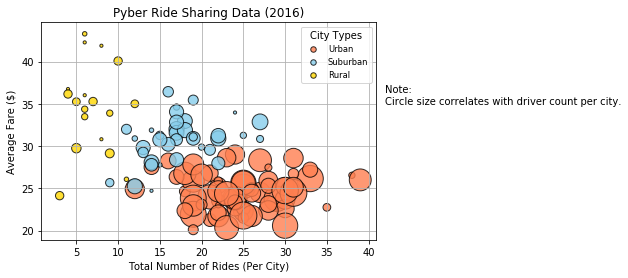

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

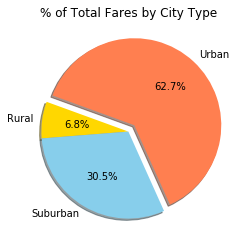

In [16]:
# Calculate Type Percents

type_groupby_df = combined_data_df.groupby('type')

fare_groupby = type_groupby_df.sum()['fare']
fare_groupby

# Build Pie Chart
fare_groupby.index
colors = ['gold', 'skyblue', 'coral']
explode = (0,0, 0.1)
plt.pie(fare_groupby, labels = fare_groupby.index, autopct = "%1.1f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 160)
plt.title('% of Total Fares by City Type')

# Save Figure


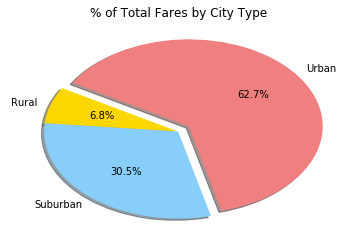

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


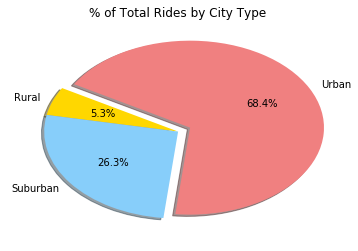

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


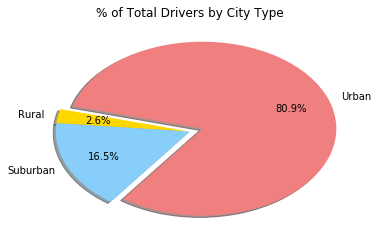

In [6]:
# Show Figure
plt.show()